In [1]:
import numpy as np  
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
train_data = pd.read_csv("archive/Training Data.csv")

In [3]:
train_data.drop("Id",axis=1)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [4]:
train_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
train_data["Profession"]=pd.factorize(train_data.Profession)[0]
train_data["CITY"]=pd.factorize(train_data.CITY)[0]
train_data["STATE"]=pd.factorize(train_data.STATE)[0]
train_data["Married/Single"]=pd.factorize(train_data['Married/Single'])[0]
train_data["House_Ownership"]=pd.factorize(train_data.House_Ownership)[0]
train_data["Car_Ownership"]=pd.factorize(train_data.Car_Ownership)[0]

In [6]:
xtrain=train_data.drop(["Risk_Flag","Id"],axis=1)
ytrain=train_data["Risk_Flag"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.3)

In [9]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_features=10,n_estimators=50)
RFC.fit(X_train,y_train)

RandomForestClassifier(max_features=10, n_estimators=50)

In [10]:

X_test.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
240957,3459166,42,12,0,0,0,33,34,1,10,12
114794,1199926,43,11,0,0,0,47,226,16,9,14
143260,84951,48,3,1,0,1,2,37,8,3,12
57441,3227716,71,10,0,0,1,38,89,2,10,13
31656,5510241,78,14,0,0,1,32,46,16,11,11


In [11]:
y_pred = RFC.predict(X_test)
print(list(y_pred))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [12]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

accu = accuracy_score(y_test,y_pred)
presi = precision_score(y_test,y_pred)
reca = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(accu)
print("--------")
print(presi)
print("--------")
print(f1)
print("-------------")
print(reca)

0.8996825396825396
--------
0.6037369570492599
--------
0.5675182481751826
-------------
0.53539918226813


<AxesSubplot:>

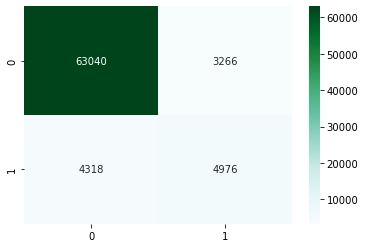

In [13]:
import seaborn as sns 

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='g', cmap="BuGn", cbar=True)

In [14]:
import pickle
pickle.dump(RFC,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
print(model)

RandomForestClassifier(max_features=10, n_estimators=50)


In [15]:
model.predict([[9760667,63,17,1,2,0,50,250,25,13,12]])


array([1], dtype=int64)